In [ ]:

import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy.spatial import distance
import random
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression, LogisticRegression
%matplotlib inline

# **Data Imputation**

In [ ]:
iris = load_iris()

X = iris['data']
y = iris['target']

np.random.seed(100)
p = np.random.permutation(len(X))
X, y = X[p], y[p]

X_train, y_train = X[:100], y[:100]
X_test, y_test = X[100:], y[100:]


def imputeData(X, y):
  random.seed(42)
  X_miss, y_miss = X.copy(), y.copy()
  for i in range(200):
    sampleId = random.randint(0, X.shape[0] - 1)
    featureId = random.randint(0, X.shape[1] - 1)
    X_miss[sampleId][featureId] = np.NaN
  return X_miss, y_miss


X_miss, y_miss = imputeData(X_train, y_train)

## 1.1 Zero Imputation  


In [ ]:
def zeroImpute(X_miss):
  '''
  Returns :
    X_imputed which has zeroes instead of missing values and same shape as X_miss.
  '''
  X_imputed = X_miss.copy()
  
  X_imputed[np.isnan(X_imputed)]=0
  assert X_imputed.shape == X_miss.shape
  
  return X_imputed


X_zero = zeroImpute(X_miss)
print('Frobenius norm for zero imputation is {0}'.format(LA.norm(X_zero - X_train)))

clf = LogisticRegression().fit(X_zero, y_miss)

print('Accuracy for zero imputation is {0}%'.format(clf.score(X_test, y_test)*100))

Frobenius norm for zero imputation is 51.66817202108083
Accuracy for zero imputation is 60.0%


## Mean Imputation  

In [ ]:
def meanImpute(X_miss):
  '''
  Returns :
    X_imputed which has mean of the corresponding column instead of the missing values and same shape as X_miss.
  '''
  X_imputed = X_miss.copy()
  
  col_mean = np.nanmean(X_imputed, axis=0)
  inds = np.where(np.isnan(X_imputed))
  X_imputed[inds] = np.take(col_mean, inds[1])
  assert X_imputed.shape == X_miss.shape

  return X_imputed

In [ ]:
X_mean = meanImpute(X_miss)
print('Frobenius norm for mean imputation is {0}'.format(LA.norm(X_mean - X_train)))

clf = LogisticRegression().fit(X_mean, y_miss)

print('Accuracy for mean imputation is {0}%'.format(clf.score(X_test, y_test)*100))



Frobenius norm for mean imputation is 13.763290287353103
Accuracy for mean imputation is 84.0%


##  Regression Imputation  

In [ ]:
def regressedImpute(X_baseImputed, X_miss, X_test, y_test, computePerFeatureStatistics = False):
  '''
  Returns :
    X_imputed which has mean of the linearly regressed value instead of the missing values and same shape as X_miss.
  if computePerFeatureStatistics is True, also:
    list of Frobenius norms of difference between reconstructions and original data (without missing values) calculated after each imputing each column.
    list of accuracies on test set of Logistic Regression classifier trained on imputed data after each imputing each column.
  '''
  X_imputed = X_baseImputed.copy()
  frobenius_norms =[]
  accuracies =[]
  
  for i in range(X_baseImputed.shape[1]):
    missing=np.isnan(X_miss[:,i])
    not_missing= [(k) for k in (np.invert(missing))]
    regression=LinearRegression().fit(np.delete(X_baseImputed[not_missing,:],i,1), X_baseImputed[not_missing,i])
    pred=regression.predict(np.delete(X_baseImputed,i,1))
    for j in range(X_baseImputed.shape[0]):
      if np.isnan(X_miss[j,i]):
        X_imputed[j,i]=pred[j]
    if computePerFeatureStatistics == True:
        frobenius_norms.append(LA.norm(X_imputed - X_train))
        clf = LogisticRegression().fit(X_imputed, y_miss)
        accuracies.append((clf.score(X_test, y_test)*100))
  if computePerFeatureStatistics == True:
    return X_imputed, frobenius_norms, accuracies
  else:
    return X_imputed


In [ ]:
a=np.array([1,23])
a[-1]

23

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


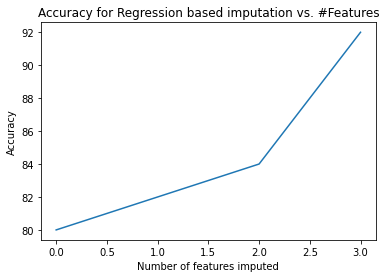

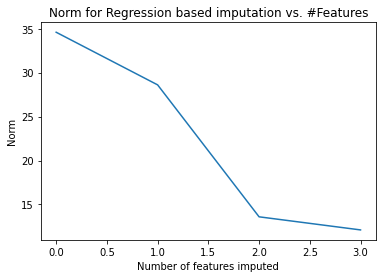

Frobenius norm and accuracy for regression based imputation after base imputation are 51.66817202108083 and 60.0%
Frobenius norm and accuracy for regression based imputation for step number 1 are 12.102907548283522 and 92.0%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Frobenius norm and accuracy for regression based imputation for step number 2 are 7.984552455666276 and 92.0%
Frobenius norm and accuracy for regression based imputation for step number 3 are 8.133939463740113 and 96.0%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Frobenius norm and accuracy for regression based imputation for step number 4 are 7.526624980372447 and 96.0%
Frobenius norm and accuracy for regression based imputation for step number 5 are 7.834564287729625 and 98.0%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


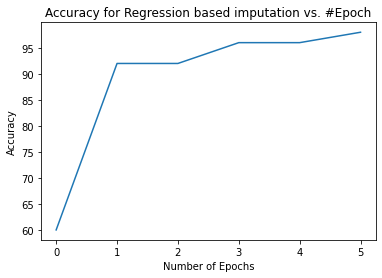

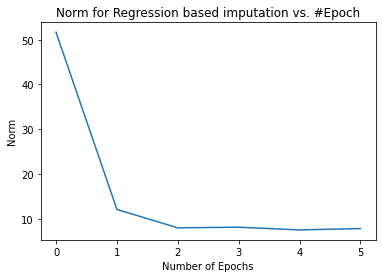

In [ ]:
norms =[]
accuracies = []
X_regressed = zeroImpute(X_miss)
X_regressed, norms, accuracies = regressedImpute(X_regressed, X_miss, X_test, y_test, True)
plt.plot(accuracies)
plt.title("Accuracy for Regression based imputation vs. #Features")
plt.ylabel('Accuracy')
plt.xlabel('Number of features imputed')
plt.show()
plt.plot(norms)
plt.title("Norm for Regression based imputation vs. #Features")
plt.ylabel('Norm')
plt.xlabel('Number of features imputed')
plt.show()


epochs = 5
norms =[]
accuracies = []

X_regressed = zeroImpute(X_miss)
norm=LA.norm(X_regressed - X_train)
clf = LogisticRegression().fit(X_regressed, y_miss)
accuracy=clf.score(X_test, y_test)*100
norms.append(norm)
accuracies.append(accuracy)
print('Frobenius norm and accuracy for regression based imputation after base imputation are {0} and {1}%'.format(norm,accuracy))


for i in range(epochs):

  X_regressed, norm1, accuracy1 = regressedImpute(X_regressed, X_miss, X_test, y_test, True)
  norm=norm1[-1]
  accuracy=accuracy1[-1]

  norms.append(norm)
  accuracies.append(accuracy)
  print('Frobenius norm and accuracy for regression based imputation for step number {0} are {1} and {2}%'.format(i + 1, norm,accuracy))
  
plt.plot(accuracies)
plt.title("Accuracy for Regression based imputation vs. #Epoch")
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.show()
plt.plot(norms)
plt.title("Norm for Regression based imputation vs. #Epoch")
plt.ylabel('Norm')
plt.xlabel('Number of Epochs')
plt.show()

In [ ]:
print(norms)

accuracies

[51.66817202108083, 12.102907548283522, 7.984552455666276, 8.133939463740113, 7.526624980372447, 7.834564287729625]


[60.0, 92.0, 92.0, 96.0, 96.0, 98.0]

## K-means

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy.spatial import distance
import random

In [ ]:
from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()

X = breast['data']
y = breast['target']

np.random.seed(100)
p = np.random.permutation(len(X))
X, y = X[p], y[p]

X_train, y_train = X[:400], y[:400]
X_val, y_val = X[400:500], y[400:500]
X_test, y_test = X[500:], y[500:]

In [ ]:
def kmeans_iter(X, centroids):
    """
    Performs one iteration of the k-means clustering algorithm.
    
    INPUT:
      X - m by n matrix, where m is the number of training points
      centroids - a list of the centroid values
    
    OUTPUT:
      clusters - an updated list of the list of indices in X for each cluster 
      updated_centroids - an updated list of the new centroid values
    """
    
    clusters = [0] * len(X)
    updated_centroids = [[0 for _ in range(len(X[0]))] for _ in range(len(centroids))]
    n_in_cluster = [0] * len(centroids)
   
    
    for i in range(len(X)):
      distancei=[ distance.euclidean(X[i], j)  for j in centroids]
      clusters[i]=np.argmin(distancei)
    for j in range(len(centroids)):
      xs=([X[k] for k in range(len(X))  if clusters[k]==j])
      if len(xs)>0:
        updated_centroids[j]=list(np.mean(xs,axis=0))
      else:
        updated_centroids[j]=centroids[j]
    return (clusters, updated_centroids)

In [ ]:

X1 = [[1], [2], [10], [12]]

init1 = [1,2]
init2 = [1,8]
init3 = [2,2]

X2 = [[0,5,0],[0,5,0],[0,4,3],[0,3,4]]

init4 = [[2.5,0,0],[-2.5,0,0]]

print(kmeans_iter(X1, init1))
print(kmeans_iter(X1, init2))
print(kmeans_iter(X1, init3))
print(kmeans_iter(X2, init4))

# a=np.array([False, True, True, True])
# X2[a]

([0, 1, 1, 1], [[1.0], [8.0]])
([0, 0, 1, 1], [[1.5], [11.0]])
([0, 0, 0, 0], [[6.25], 2])
([0, 0, 0, 0], [[0.0, 4.25, 1.75], [-2.5, 0, 0]])


In [ ]:
def kmeans(X, k):
    """
    Performs k-means clustering by calling kmeans_iter until no centroid value changes.
    
    INPUT:
      X - m by n matrix, where m is the number of training points
      k - the number of clusters

    OUTPUT:
      clusters - a list of the list of indices in X for each cluster 
      centroids - a list of the centroid values for each cluster
      iters - the number of iterations it took for k-means to converge
    """
    
    random.seed(520)
    centroid_init = random.sample(range(0,len(X)), k)
    centroids = [X[centroid_init[i]] for i in range(k)] 
    prev_centroids = None    
    iters = 0
    
    while np.array_equal(centroids,prev_centroids)==False:
      prev_centroids=centroids
      clusters, centroids=kmeans_iter(X, centroids)
      iters+=1
    return (clusters, centroids, iters)

9


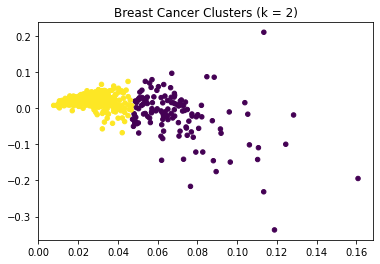

23


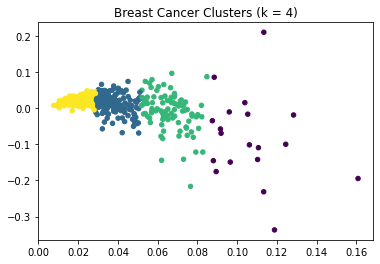

20


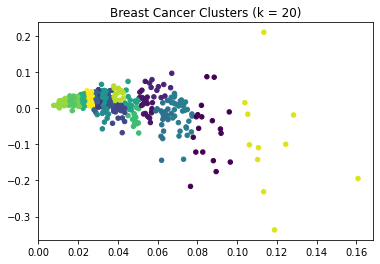

In [ ]:
pca = PCA(n_components = 2)
v = pca.fit(np.transpose(X)).components_

for k in [2,4,20]:
    (clusters, centroids, iters) = kmeans(X,k)
    print(iters)
    plt.scatter(v[0], v[1], c=clusters, s= 20)
    plt.title("Breast Cancer Clusters (k = "+str(k) + ")")
    plt.show()

In [ ]:
def test_cluster_size(X, max_k):
    """
    Iterates over possible cluster from 2 to max_k, running k-means and calulating distortion.
    
    INPUT:
      X - m by n matrix, where m is the number of training points
      max_k - the maximum number of clusters to consider
    
    OUTPUT:
      scores - a list of scores, where score[i] is the distortion for k-means with i clusters
    """
    scores = [0] * (max_k-1)
    
    for i in range(2,max_k+1):
      (clusters, centroids, iters) = kmeans(X,i)
      scores[i-2]=sum([ distance.euclidean(X[j], centroids[clusters[j]])  for j in range(len(X))])
    return scores

### Distortion Plot

152647.2518933295
132217.36606306452
100118.40839462666
82970.20500225552
73010.4992956251
64714.45992813425
58710.45244591184
56536.744137610774
51381.93363659709
50450.98511357641
48228.90981407298
44942.3962158257
44246.052599146984
43473.69481264401
41231.996730384446
39362.484735838574
38787.49238832743
38054.41657331303
37649.127325570444
36720.193578805294
36322.01514029025
35559.07889328774
33779.50306836631
33209.39666470231


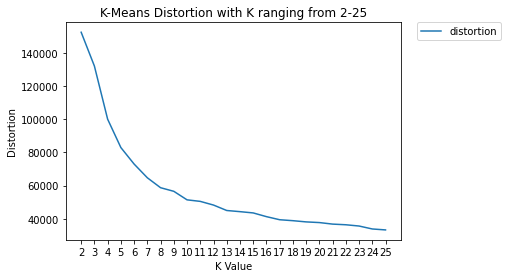

In [ ]:
max_k = 25

scores = test_cluster_size(X, max_k)

plt.plot(range(max_k-1), scores, label='distortion')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('K-Means Distortion with K ranging from 2-25')
plt.ylabel('Distortion')
plt.xlabel('K Value')
plt.xticks(range(max_k-1), range(2,max_k+1))
plt.show()

### Feature Scaling 

In [ ]:
X_copy = X.copy()
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X_copy)

318.30588325673546
299.32865930327023
286.5455079559054
277.73580373234194
272.8761293461454
262.39015127522435
258.5812702527984
253.06777129961526
251.16595699316449
247.9124911939583
239.52845715234605
235.61130600615223
234.62385045974824
230.60624177991292
228.64560094436177
225.78299679398913
224.29580920048653
223.21282899075914
221.26393647930198
219.18576250529603
217.4213039216525
214.79209442905966
214.32063242682332
212.41544445087368


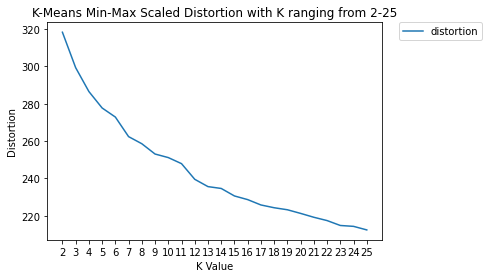

In [ ]:
max_k = 25
scores = test_cluster_size(X_scaled, max_k)

plt.plot(range(max_k-1), scores, label='distortion')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('K-Means Min-Max Scaled Distortion with K ranging from 2-25')
plt.ylabel('Distortion')
plt.xlabel('K Value')
plt.xticks(range(max_k-1), range(2,max_k+1))
plt.show()

### Log Scaling

440.17628745696845
385.28363423389686
356.95321196998503
342.0328323399844
323.169377441221
309.49280865575366
303.84987518255963
297.0763863765023
285.5494752260653
283.4518317690821
281.38900988798366
272.26020203649324
265.5039008572079
262.91569060803164
259.66329512076004
253.08723659004832
249.72962864314516
247.96541788260726
248.75082596685016
246.14757973058232
239.460321787984
238.70200830042134
237.42675286250503
232.8778412362349


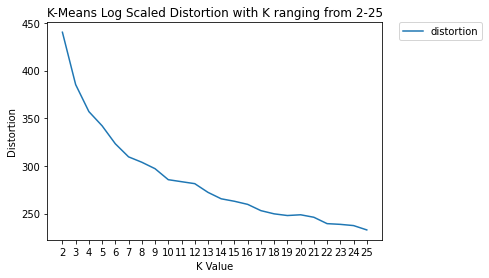

In [ ]:
def logarithmize(x):
    x=x+1 
    x=np.log(x)
    return x

logarithmize_v=np.vectorize(logarithmize)
X_copy2 = X.copy()
X_log=logarithmize_v(X_copy2)

max_k = 25
scores = test_cluster_size(X_log, max_k)

plt.plot(range(max_k-1), scores, label='distortion')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('K-Means Log Scaled Distortion with K ranging from 2-25')
plt.ylabel('Distortion')
plt.xlabel('K Value')
plt.xticks(range(max_k-1), range(2,max_k+1))
plt.show()